## Övning 3.11

Uppgiften lyder
<img src="img/exe3.11.png">

In [21]:
import pandas as pd
import numpy as np

stickprov = \
  [[84.32,84.24,84.29,84.14,84.50,84.70], \
   [84.51,84.25,84.40,84.22,83.88,84.17], \
   [84.63,84.41,84.68,84.02,84.49,84.11], \
   [84.61,84.13,84.28,84.48,83.91,84.36], \
   [84.64,84.00,84.40,84.27,84.11,84.61], \
   [84.51,84.30,84.36,84.33,84.06,83.81]]

data = pd.DataFrame(stickprov,columns=["A","B","C","D","E","F"])
data

,A,B,C,D,E,F
0,84.32,84.24,84.29,84.14,84.50,84.70
1,84.51,84.25,84.40,84.22,83.88,84.17
2,84.63,84.41,84.68,84.02,84.49,84.11
3,84.61,84.13,84.28,84.48,83.91,84.36
4,84.64,84.00,84.40,84.27,84.11,84.61
5,84.51,84.30,84.36,84.33,84.06,83.81


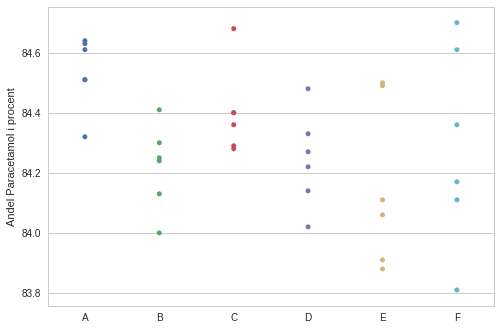

In [29]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", color_codes=True)
sns.stripplot(data=data)
plt.ylabel("Andel Paracetamol i procent")

In [23]:
antal = data.count()
antal_klasser = antal.count()
antal_replikat = antal["A"]

medel = data.mean()
var = data.var()
global_medel = data.mean(axis=1).mean()
print global_medel
print medel

84.3091666667
A    84.536667
B    84.221667
C    84.401667
D    84.243333
E    84.158333
F    84.293333
dtype: float64


In [24]:
mellan_prov_var = (antal_replikat*(medel-global_medel)**2).sum()/(antal_klasser-1)
mellan_prov_var

0.11436499999999747

In [25]:
inom_prov_var = data.var().sum()/antal_klasser
inom_prov_var

0.044521666666666848

Vi kan nu göra ett F-test för att se om serierna har signifikant olika varians. Se (3.6.1)

In [26]:
F=mellan_prov_var/inom_prov_var
F

2.5687492980944935

Kritiskt värde kan utläsas ur tabel A.4 eller ur följande formel.

In [27]:
from scipy.stats import f
f.ppf(1-0.05,antal_klasser-1,antal_klasser*(antal_replikat-1))

2.53355454755927

Eftersom vårt värde $F$ är större än det kritiska värdet så kan vi förkasta att serierna har samma genomsnitt. Vi skulle även kunnat komma till samma slutsats genom att räkna ut $F$-testets $p$-värde

In [28]:
p=f.sf(F,antal_klasser-1,antal_klasser*(antal_replikat-1))
p

0.047561769610021815